# Prediction of Salary of Baseball players using DecisionTree

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")

from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeRegressor

import graphviz
from sklearn import tree

### Reading the Data

In [2]:
hitters_data = pd.read_csv("D:/PROGRAMS and PROJECTS/jupyter_programs/datasets/Hitters.csv")
hitters_data.dropna(axis=0, how="any", subset=["Salary"], inplace=True)
hitters_data.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [3]:
transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)
y = transformer.transform(hitters_data.Salary.values.reshape(-1, 1))
x = hitters_data[["Years", "Hits"]]

### Plotting the Data

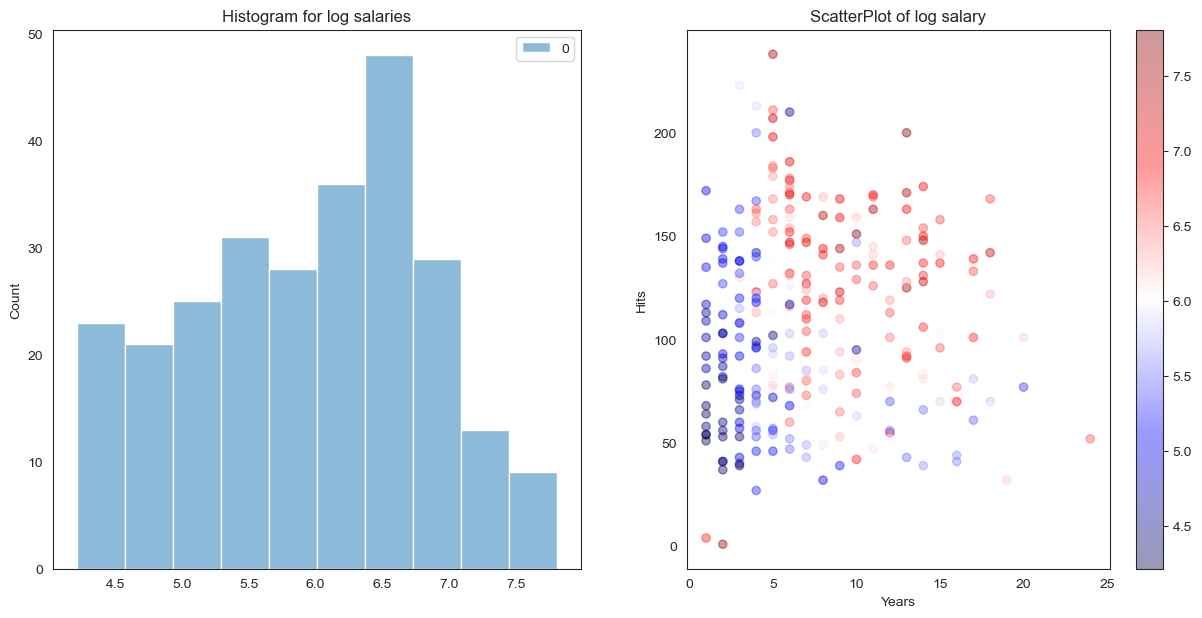

In [4]:
# Plotting the Dataset
figr = plt.figure(figsize=(15,7))
distplot = plt.subplot(121)
distplot = sns.histplot(y)
distplot.set_title("Histogram for log salaries")


distplot = plt.subplot(122)
distplot_1 = distplot.scatter(hitters_data.Years, hitters_data.Hits, alpha=0.4, c=y.flatten(), cmap="seismic")
distplot.set_xlabel("Years")
distplot.set_ylabel("Hits")
distplot.set_title("ScatterPlot of log salary")
plt.colorbar(distplot_1)

plt.show()

### Prediction

In [5]:
# Prediction
tree_hitters = DecisionTreeRegressor(random_state=0, max_depth=2, max_leaf_nodes=3)
tree_hitters.fit(x.values, y)

DecisionTreeRegressor(max_depth=2, max_leaf_nodes=3, random_state=0)

In [6]:
# !pip install Graphviz

In [7]:
import os
os.environ["PATH"] += os.pathsep + "C:/Users/koushik/.conda/pkgs/graphviz-2.38-hfd603c8_2/Library/bin"

### Plotting the Decision Tree

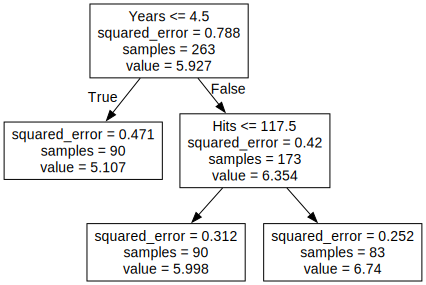

In [8]:
tree_data = tree.export_graphviz(tree_hitters, out_file=None, feature_names=["Years", "Hits"], class_names=["Salary"])
graph = graphviz.Source(tree_data)
graph

In [9]:
# graph.format="jpg"
# graph.render("DecisionTreePractice_Hitters")

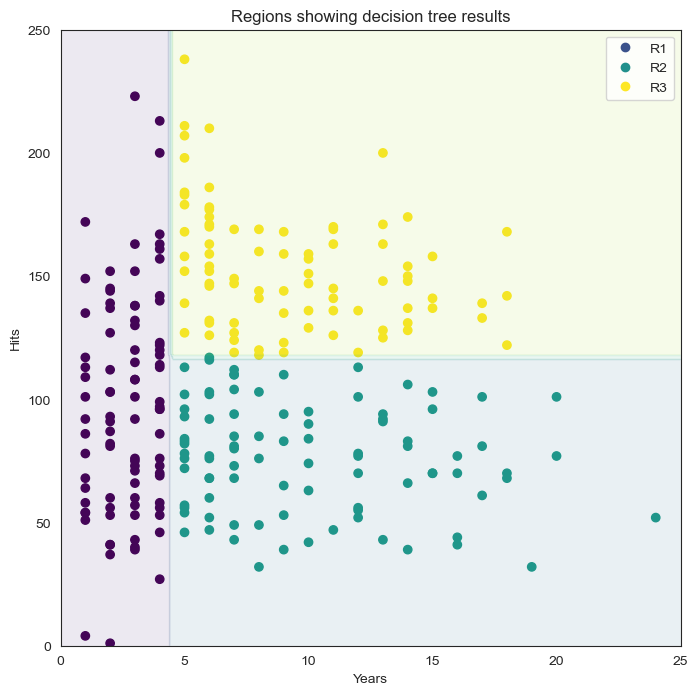

In [10]:
# Scatter plot
log_predictions = np.round(tree_hitters.predict(x.values),2).flatten()
color_dict = {'R1':'#3B528BFF','R2':'#21908CFF','R3':'#FDE725FF'}
plt.figure(figsize=(8,8))
plt.scatter(x.Years,x.Hits,c = log_predictions,cmap='viridis')

# plot the decision summary here
N = 100
X1 = np.linspace(0,25,N)
X2 = np.linspace(0,250,N)

X1,X2 = np.meshgrid(X1,X2)

zz = np.array(   [tree_hitters.predict(np.array([xx,yy]).reshape(1,-1)) 
                  for xx,yy in zip(np.ravel(X1),np.ravel(X2)) ])

Z = zz.reshape(X1.shape)

plt.contourf(X1,X2,Z,3,alpha = 0.1,cmap = 'viridis')
plt.contour(X1,X2,Z,3,alpha = 0.1,cmap = 'viridis')

#Legend - line breaks in between 

markers = [plt.Line2D([0,0],[0,0],color=color,marker='o',linestyle='') for color in color_dict.values()]

plt.legend(markers,color_dict.keys(),numpoints=1)
plt.xlabel('Years')
plt.ylabel('Hits')
plt.title('Regions showing decision tree results')
plt.show()

In [11]:
preds = transformer.inverse_transform(log_predictions.reshape(1, -1)) *1000
print(preds)

[[403428.79349274 165670.35487373 845560.73585104 165670.35487373
  845560.73585104 165670.35487373 165670.35487373 165670.35487373
  403428.79349274 845560.73585104 403428.79349274 165670.35487373
  403428.79349274 403428.79349274 845560.73585104 403428.79349274
  403428.79349274 165670.35487373 165670.35487373 403428.79349274
  845560.73585104 845560.73585104 403428.79349274 845560.73585104
  845560.73585104 845560.73585104 165670.35487373 845560.73585104
  403428.79349274 403428.79349274 165670.35487373 165670.35487373
  165670.35487373 403428.79349274 165670.35487373 403428.79349274
  845560.73585104 403428.79349274 165670.35487373 845560.73585104
  403428.79349274 403428.79349274 165670.35487373 403428.79349274
  845560.73585104 165670.35487373 403428.79349274 165670.35487373
  165670.35487373 845560.73585104 165670.35487373 165670.35487373
  403428.79349274 845560.73585104 845560.73585104 845560.73585104
  845560.73585104 165670.35487373 403428.79349274 165670.35487373
  403428.7